In [3]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [4]:
os.getcwd()


C:\Users\kzhg1\anaconda3\lib\site-packages\keras\api\_v2\keras\__init__.py


In [31]:
# make directories
os.makedirs('train/dog')
os.makedirs('train/cat')
os.makedirs('valid/dog')
os.makedirs('valid/cat')
os.makedirs('test/dog')
os.makedirs('test/cat')

In [32]:
# move images randomly
#os.chdir('Keras_tutorial')
for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('cat*'), 10):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('dog*'), 10):
    shutil.move(c, 'test/dog')

In [ ]:
#Alladin Persson

In [15]:
# zet de working directory
os.chdir('C:/Users/kzhg1/_PycharmProjects/Keras_tutorial/train')

In [16]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [17]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)




Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [20]:
imgs, labels = next(train_batches)

In [21]:
labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [22]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

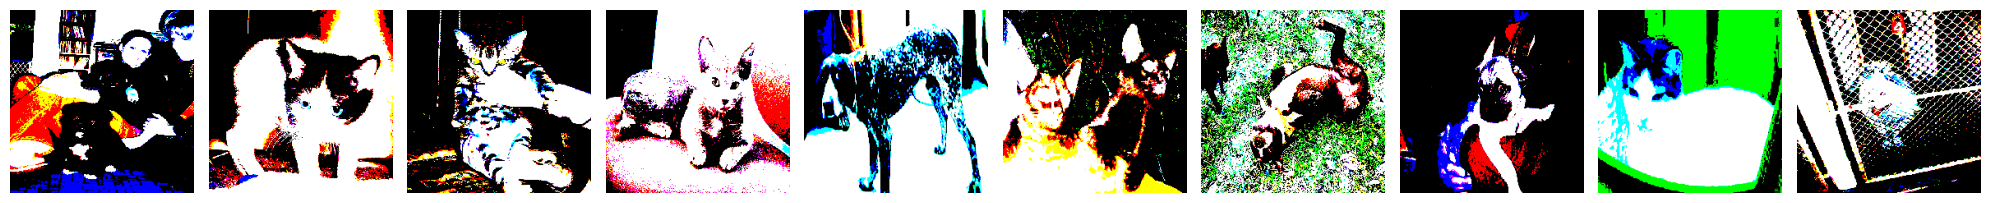

In [23]:
plotImages(imgs)

<h1>First CNN</h1>

In [24]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [27]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 49s - loss: 17.3221 - accuracy: 0.5500 - val_loss: 5.6990 - val_accuracy: 0.6100 - 49s/epoch - 495ms/step
Epoch 2/10
100/100 - 46s - loss: 3.5134 - accuracy: 0.7130 - val_loss: 15.5062 - val_accuracy: 0.4950 - 46s/epoch - 460ms/step
Epoch 3/10
100/100 - 44s - loss: 1.2632 - accuracy: 0.8620 - val_loss: 2.5111 - val_accuracy: 0.6800 - 44s/epoch - 442ms/step
Epoch 4/10
100/100 - 44s - loss: 0.2507 - accuracy: 0.9380 - val_loss: 2.2542 - val_accuracy: 0.6400 - 44s/epoch - 444ms/step
Epoch 5/10
100/100 - 47s - loss: 0.1002 - accuracy: 0.9690 - val_loss: 2.3916 - val_accuracy: 0.6600 - 47s/epoch - 466ms/step
Epoch 6/10
100/100 - 43s - loss: 0.0111 - accuracy: 0.9960 - val_loss: 2.2357 - val_accuracy: 0.6600 - 43s/epoch - 425ms/step
Epoch 7/10
100/100 - 39s - loss: 0.0103 - accuracy: 0.9980 - val_loss: 2.3401 - val_accuracy: 0.6700 - 39s/epoch - 393ms/step
Epoch 8/10
100/100 - 39s - loss: 0.0023 - accuracy: 0.9990 - val_loss: 2.2488 - val_accuracy: 0.6500 - 39s/epoch - 3

<h1>Prediction</h1>

In [28]:
test_imgs, test_labels = next(test_batches)

In [29]:
predictions = model.predict(x=test_batches, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1) )

In [33]:
os.chdir('C:/Users/kzhg1/_PycharmProjects/Keras_tutorial')
model.save('models/cats_vs_dogs_CNN.h5') 